In [358]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import datetime as dt
import pickle
import seaborn as sns
import numpy as np

%matplotlib inline

In [82]:
threetofour = pd.read_csv("data/3to4.csv")

In [3]:
all4 = pd.read_csv("data/all4.csv")

In [6]:
threetofour = threetofour.rename(columns = {"Overall_x":"Overall_18", "Bib_x":"Bib_18", "Time_x":"Time_18", "Overall_y":"Overall_19", "Bib_y":"Bib_19", "Time_y":"Time_19"})

In [92]:
threetofour.shape

(106, 14)

In [8]:
all4 = all4[['Overall_16', 'Bib_16', 'Name', 'Time_16', 'Overall_17', 'Bib_17', 'Time_17', 'Overall_118', 'Bib_18', 'Time_18', 'Overall_19', 'Bib_19', 'Time_19']]

In [10]:
all4 = all4.rename(columns = {"Overall_118":"Overall_18"})

In [73]:
all4.head()

,Overall_16,Bib_16,Name,Time_16,Overall_17,Bib_17,Time_17,Overall_18,Bib_18,Time_18,Overall_19,Bib_19,Time_19
0,36,1070,Edgar Garza,03:13:18,6,1135,03:06:20,20,30048,03:05:40,12,30038,02:56:40
1,68,4085,Tien Le,03:22:08,57,3128,03:32:19,123,30060,03:34:43,192,30069,03:41:15
2,91,2005,Edwin Reyes,03:25:57,122,4128,03:44:12,120,30098,03:33:52,112,30109,03:30:56
3,145,2124,Lauren Terrell,03:31:51,62,2123,03:33:02,275,33455,03:53:29,99,33168,03:28:54
4,179,405,Dan Albert,03:36:19,2465,429,06:38:15,707,517,04:25:38,754,101,04:26:51


In [74]:
threetofour = threetofour[['Overall_16', 'Bib_16', 'Name', 'Time_16', 'Overall_17', 'Bib_17', 'Time_17', 'Overall_18', 'Bib_18', 'Time_18', 'Overall_19', 'Bib_19', 'Time_19']]

In [76]:
threetofourX = threetofour[['Name', 'Time_16', 'Time_17', 'Time_18', 'Time_19']]
threetofourX.shape

(106, 5)

In [197]:
M16_M19 = pd.read_pickle("data/M16_M19.pkl")

In [199]:
M16_M19 = M16_M19[M16_M19['Time'] >= '02:25:42']

In [198]:
M16_M19.shape

(12280, 5)

In [200]:
M16_M19 = M16_M19[M16_M19['Time'] != '06:00:39']

In [202]:
M16_M19.shape

(9610, 5)

In [217]:
run_counts = M16_M19['Name'].value_counts()
count_list = run_counts[run_counts == 3].index.tolist()
ran3 = M16_M19[M16_M19['Name'].isin(count_list)]

Ok, weird. I show 117 runners ran 3 races, not the expected 115. NOt really sure what is going on here.
Further, I show 46 runners in python. I did remove times = 00:00:00 here, whihc I did not remove in excel. This may perhaps account for the problem. 

In [220]:
ran3.to_csv("data/ran3.csv")

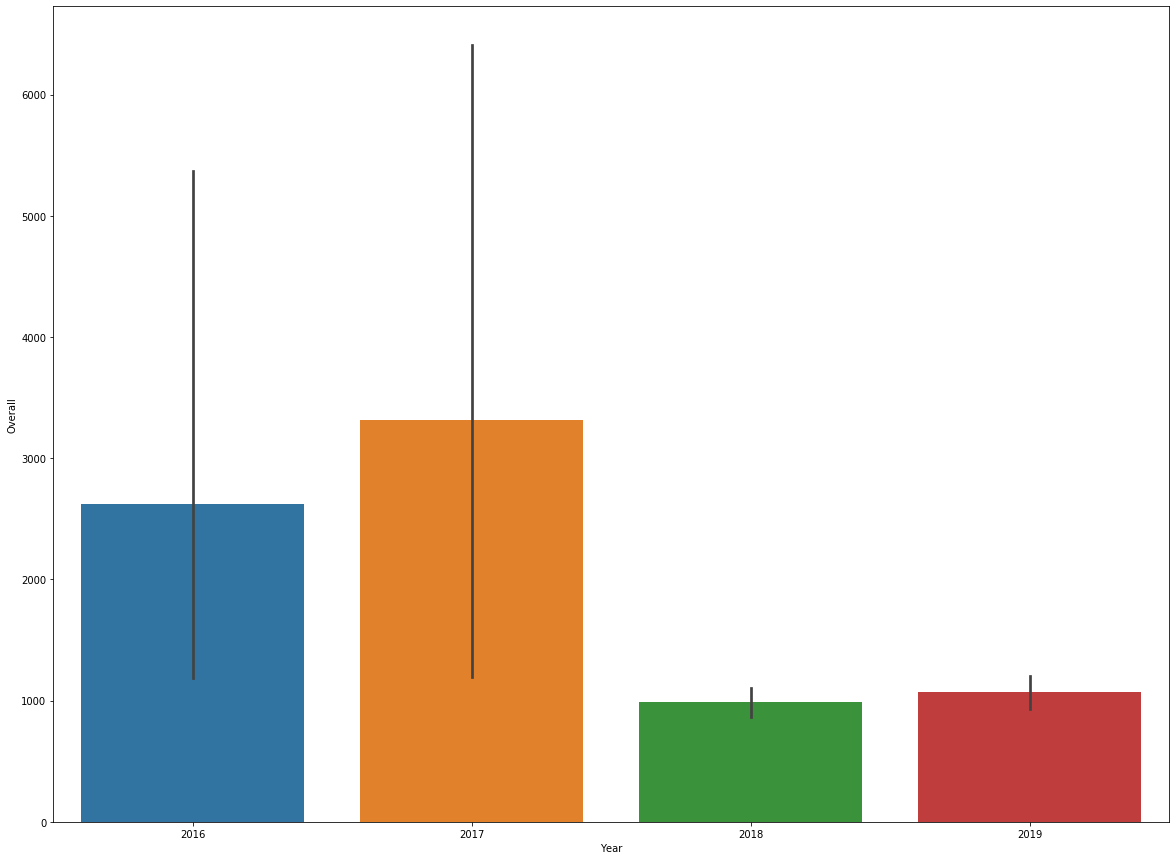

In [297]:
ax, fig = plt.subplots(figsize=(20,15))
sns.barplot(x='Year', y='Overall', data=ran3);

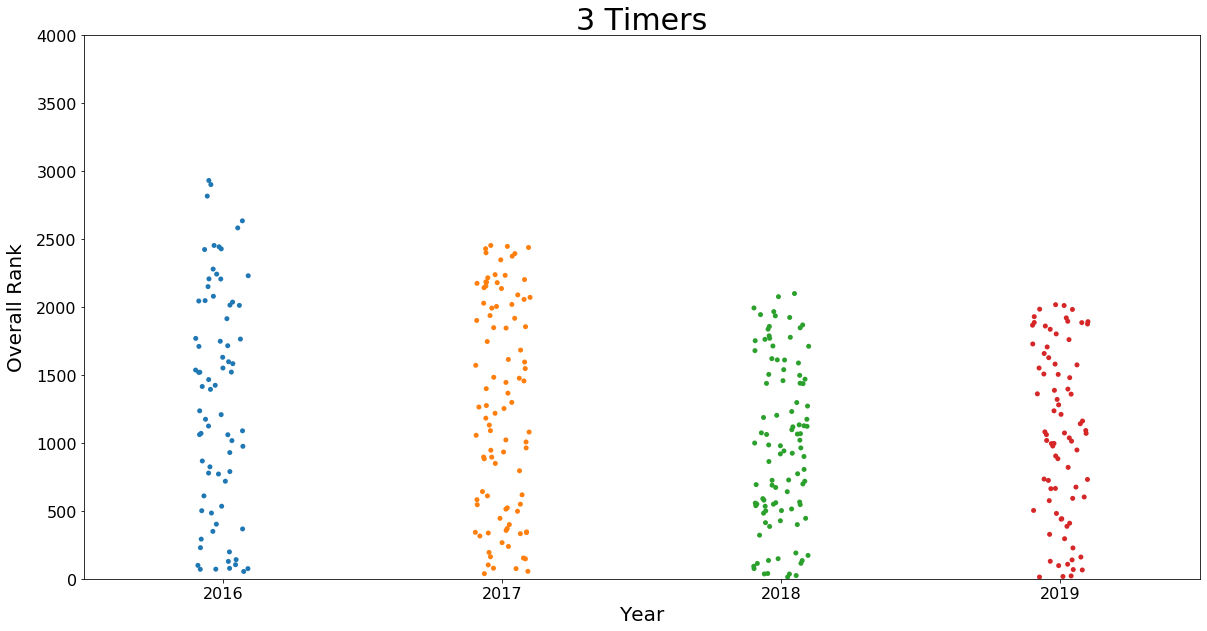

In [355]:
ax, fig = plt.subplots(figsize=(20,10))
sns.stripplot(x='Year', y='Overall', data=ran3)
plt.ylim(0, 4000)
plt.ylabel("Overall Rank",fontsize=20, labelpad=10)
plt.xlabel("Year", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("3 Timers", fontsize=30);

In [234]:
run_counts = M16_M19['Name'].value_counts()
count_list4 = run_counts[run_counts == 4].index.tolist()
ran4 = M16_M19[M16_M19['Name'].isin(count_list4)]

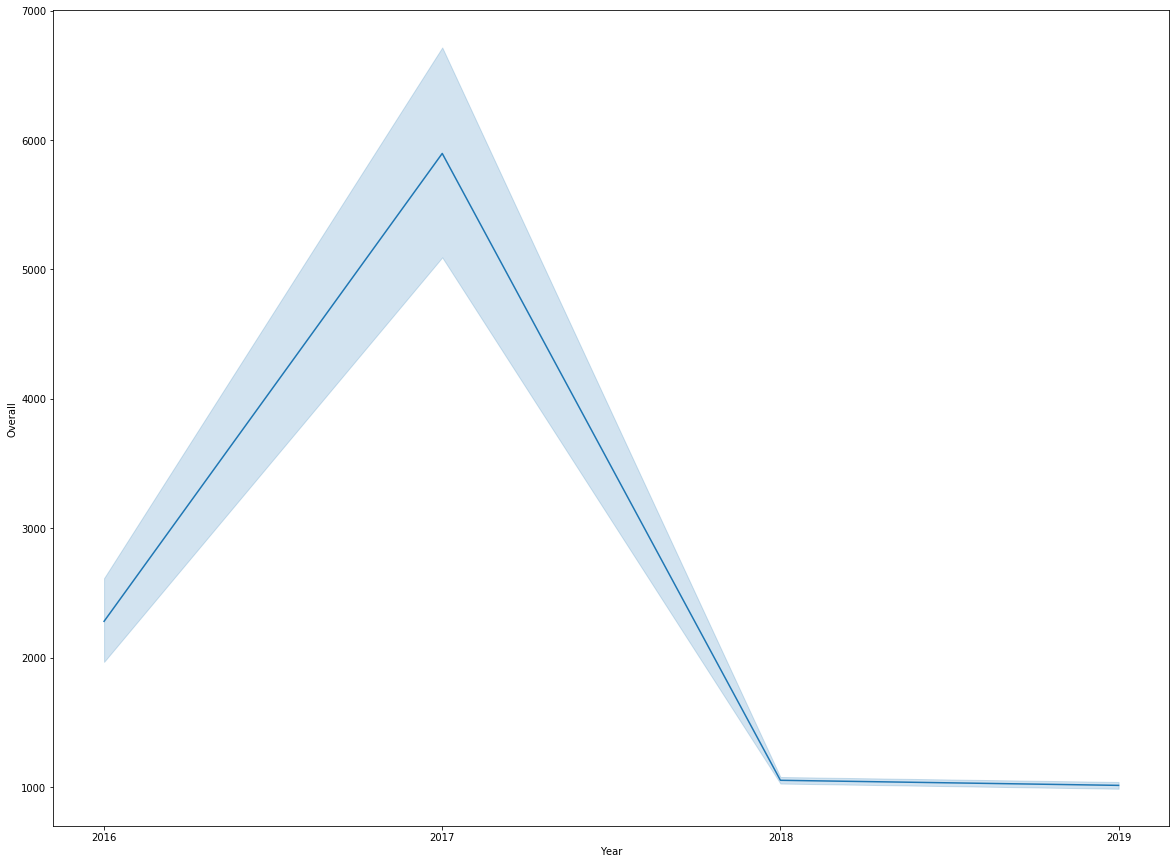

In [342]:
ax, fig = plt.subplots(figsize=(20,15))
sns.lineplot(x='Year', y='Overall', data=M16_M19);

Text(0.5, 1.0, '4 Timers')

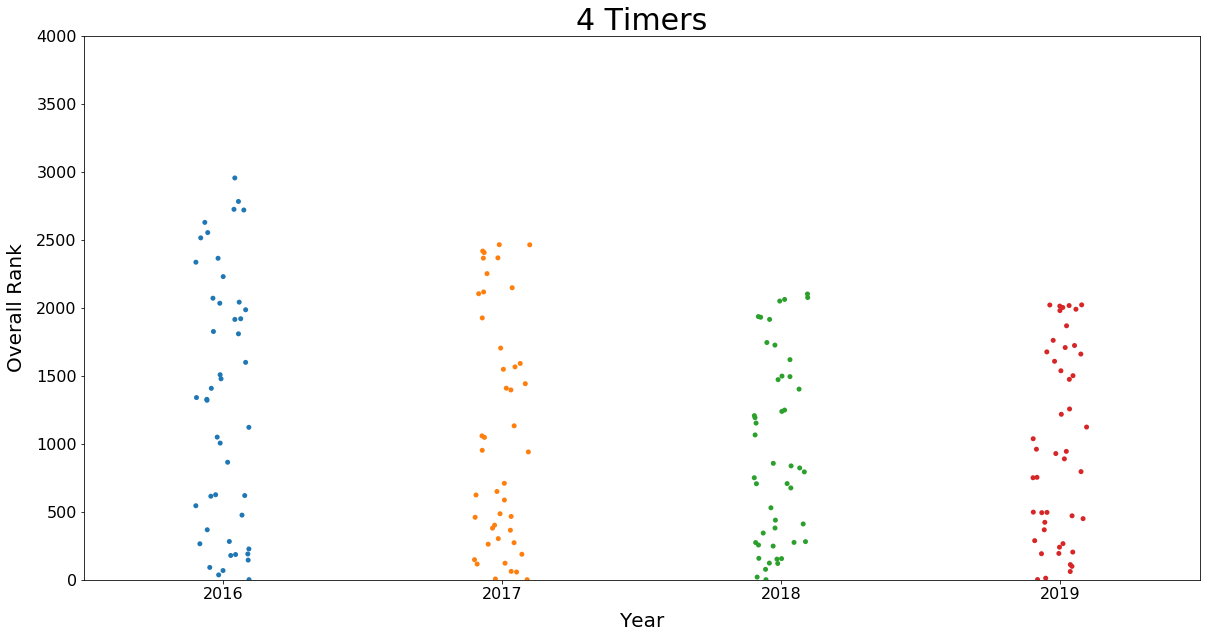

In [349]:
ax, fig = plt.subplots(figsize=(20,10))
sns.stripplot(x='Year', y='Overall', data=ran4)
plt.ylim(0, 4000)
plt.xlabel("Year", fontsize=20, labelpad=10)
plt.ylabel("Overall Rank",fontsize=20, labelpad=10)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("4 Timers", fontsize=30)

In [310]:
ran4.shape

(184, 5)

In [266]:
ran4.to_csv("data/ran4.csv")

In [311]:
ran4_under9k = ran4[ran4['Overall'] != '90000.0']

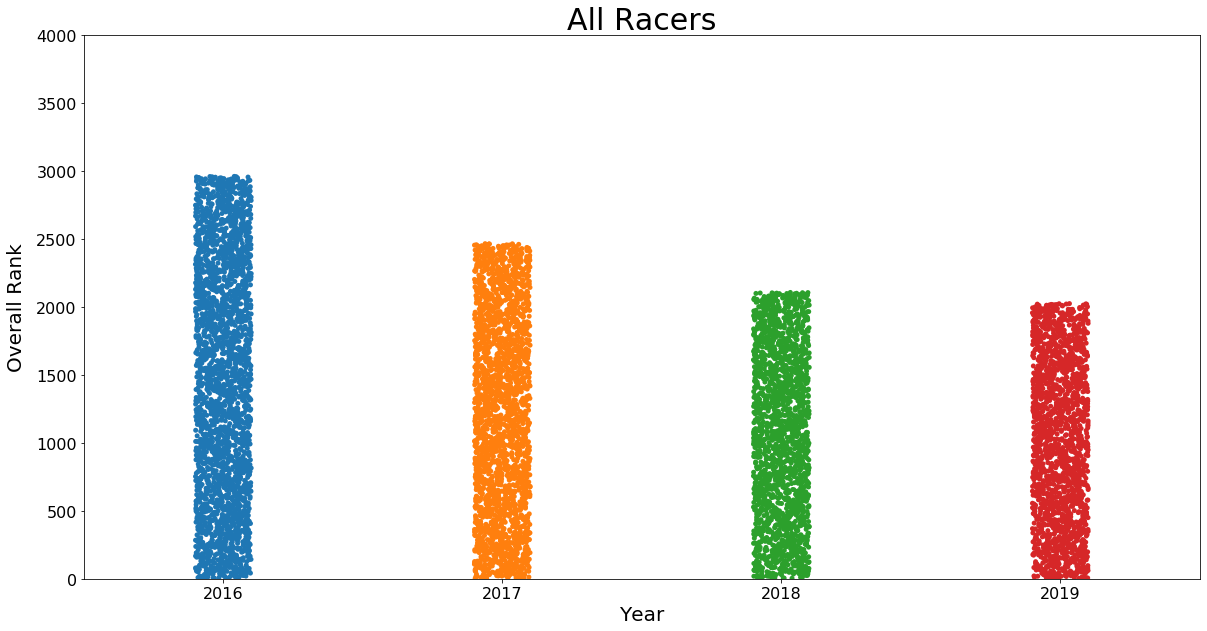

In [354]:
ax, fig = plt.subplots(figsize=(20,10))
sns.stripplot(x='Year', y='Overall', data=M16_M19)
plt.ylim(0, 4000)
plt.ylabel("Overall Rank",fontsize=20, labelpad=10)
plt.xlabel("Year", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("All Racers", fontsize=30);